Women's ICC T20 World Cup data visualisation, looking the 5 most recent tournaments.
Original json files/stats taken from https://cricsheet.org/downloads/

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import HTML

NAME_CHANGES = {
    "NR Sciver": "NR Sciver-Brunt",
    "KH Brunt" : "KH Sciver-Brunt",
}

COUNTRY_INFO = {
    "Australia" : ("xkcd:canary yellow", "AUS"),
    "Bangladesh" : ("xkcd:pine","BNG"),
    "England": ("xkcd:bright red","ENG"),
    "India": ("xkcd:royal blue", "IND"),
    "Ireland" : ("xkcd:bright green","IRL"),
    "New Zealand": ("xkcd:slate grey", "NZL"),
    "Pakistan" : ("xkcd:emerald", "PAK"),
    "Thailand" : ("xkcd:bright sky blue", "THA"),
    "South Africa" : ("xkcd:yellow/green", "RSA"),
    "Sri Lanka" : ("xkcd:mid blue", "SRI"),
    "West Indies" : ("xkcd:maroon","WIN"),
}

def namecheck(player):
    try:
        return NAME_CHANGES[player]
    except KeyError:
        return player
    

In [28]:
original_data = pd.read_csv("ICC_Cup_Data.csv")
player_data = pd.read_csv("WCPlayersList.csv")
player_data = player_data.map(namecheck)
for col in player_data.columns:
    player_data.loc[player_data[col].duplicated(),col] = np.NaN

def find_nationality(player):
    for k in player_data.columns:
        if player in player_data[k].values:
            return k

In [29]:
def make_pie_charts(column,colours,axis,df,title):   
    counts =  df[column].value_counts().sort_index().tolist() 
    for_legend,texts,_ = axis.pie(x=counts,colors=colours,autopct='%1.1f%%',wedgeprops={'edgecolor' : 'black'})
    axis.set_title(title)
    return for_legend

pieChart_data = original_data[['season','toss winner','winner','decision from toss','was result?']].copy()

def bat_first_and_won(row):
    cond1 = row['decision from toss'] == 'bat' and row['toss_and_game_win']
    cond2 = row['decision from toss'] == 'field' and not row['toss_and_game_win']
    if cond1 or cond2:
        return True
    return False

pieChart_data['toss_and_game_win'] = pieChart_data['toss winner'] == pieChart_data['winner']
pieChart_data['batting_first_and_won'] = pieChart_data.apply(bat_first_and_won,axis=1)


y2014, y2016, y2018, y2020, y2023 = [x for _,x in pieChart_data.groupby(pieChart_data['season'])]
dfs = [y2014,y2016,y2018,y2020,y2023]
titles = ["2014","2016","2018","2020","2023"]


date,season,winner
2014-04-06,2013/14,Australia
2016-04-03,2015/16,West Indies
2018-11-24,2018/19,Australia
2020-03-08,2019/20,Australia
2023-02-26,2022/23,Australia


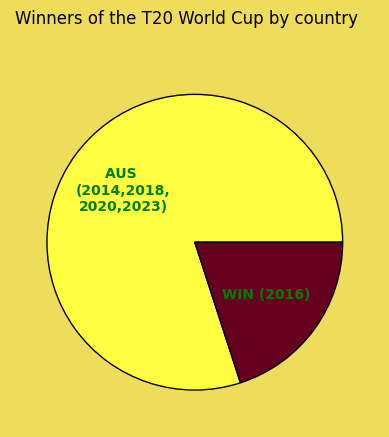

In [42]:
def format(pct):
    if int(pct) == 80:
        return "AUS \n(2014,2018,\n2020,2023)"
    return "WIN (2016)"

fig5,ax5 = plt.subplots()
finals_wins = original_data[original_data['stage'] == 'Final'].copy()
finals_wins = finals_wins[['date','season','winner']]
counts = finals_wins['winner'].value_counts().sort_index().tolist()
ax5.pie(counts,autopct=lambda pct : format(pct),colors=['xkcd:canary yellow','xkcd:maroon'],wedgeprops={'edgecolor' : 'black'},textprops=dict(color="green",fontweight='bold'))
fig5.suptitle("Winners of the T20 World Cup by country")
fig5.set_facecolor("xkcd:dull yellow")
HTML(finals_wins.to_html(index=False))

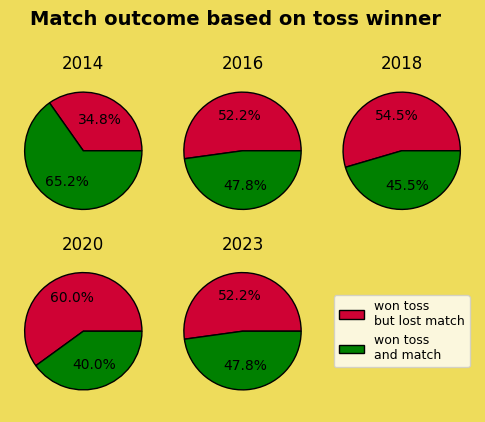

In [31]:
fig1, ax1 = plt.subplots(2,3,figsize=(6,6))
axes1 = ax1.ravel()

for (i,j,k) in zip(axes1,dfs,titles):
    cleaned_df = j[j['was result?'].isna()]
    colours = make_pie_charts('toss_and_game_win',['xkcd:cherry','green'],i,cleaned_df,k,)

axes1[5].set_axis_off()
axes1[5].legend((colours[0],colours[1]),('won toss \nbut lost match','won toss \nand match'),loc='center',fontsize=9)

fig1.subplots_adjust(bottom=0.31,top=0.88,wspace=0.086,hspace=0.117)
fig1.suptitle("Match outcome based on toss winner",fontsize=14,fontweight='bold')
fig1.set_facecolor("xkcd:dull yellow")


Text(0.5, 0.98, 'Wins based on batting order')

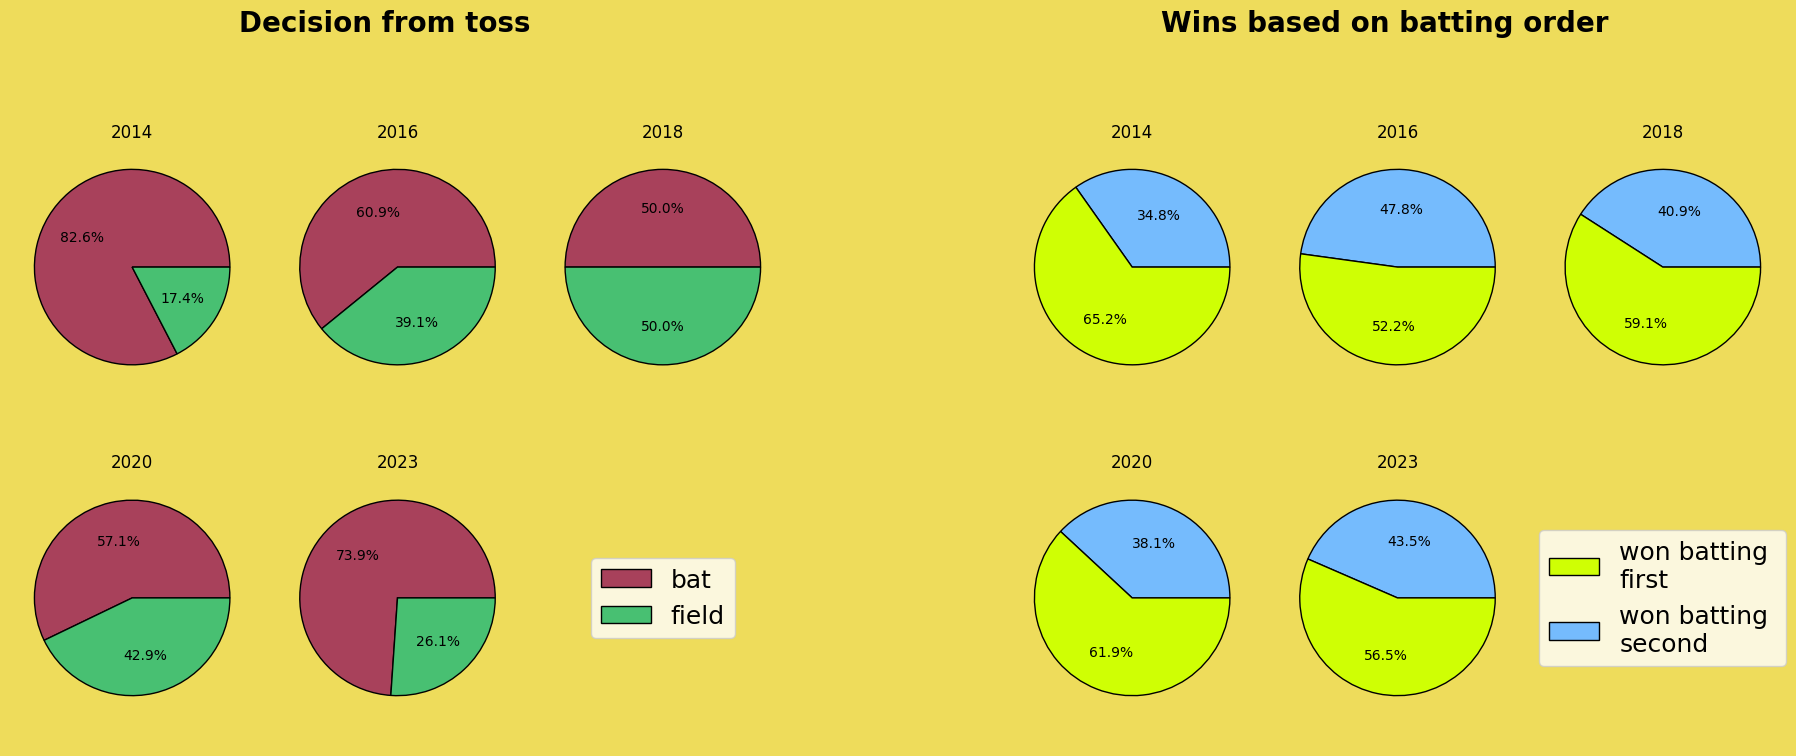

In [32]:
fig = plt.figure(figsize=(20, 11))
fig.set_facecolor("xkcd:dull yellow")
subfigs = fig.subfigures(1, 2,)

axsLeft = subfigs[0].subplots(2, 3)
axes2 = axsLeft.ravel()
for (i,j,k) in zip(axes2,dfs,titles):
    colours = make_pie_charts('decision from toss',['xkcd:light burgundy','xkcd:dark mint'],i,j,k)

axes2[5].set_axis_off()
axes2[5].legend((colours[0],colours[1]),('bat','field'),loc='center',fontsize=18)

subfigs[0].suptitle("Decision from toss",fontsize=20,fontweight='bold')
subfigs[0].subplots_adjust(bottom=0.31,top=0.88,wspace=0.086,hspace=0.117)

axsRight = subfigs[1].subplots(2, 3)
axes4 = axsRight.ravel()
for (i,j,k) in zip(axes4,dfs,titles):
    colours = make_pie_charts("batting_first_and_won",['xkcd:sky blue','xkcd:neon yellow'],i,j,k,)

axes4[5].set_axis_off()
axes4[5].legend((colours[1],colours[0]),('won batting \nfirst','won batting \nsecond'),loc='center',fontsize=18)

subfigs[1].subplots_adjust(bottom=0.31,top=0.88,wspace=0.086,hspace=0.117)
subfigs[1].suptitle("Wins based on batting order",fontsize=20,fontweight='bold')

Generally more matches are won when setting the score, as opposed to chasing.

Interestingly, in 2014 there were only 4 matches where teams chose to field first. These were the first 2 matches of the tournament, the semi-final and the final.

In [33]:
winnerDf = original_data[['winner','season','Team 1','Team 2']].copy()
y2014c, y2016c, y2018c, y2020c, y2023c = [x for _,x in winnerDf.groupby(winnerDf['season'])]
dfsc = [y2014c,y2016c,y2018c,y2020c,y2023c]

years = []
for j in dfsc:
    winners = j['winner'].value_counts().sort_index().index.tolist()
    all_teams = np.concatenate([j['Team 1'].unique(),j['Team 2'].unique()],axis=0)
    missing = list(set(all_teams) - set(winners))
    wins = j['winner'].value_counts().sort_index().tolist() 
    wins += [0] * len(missing)
    winners += missing
    years.append((list(zip(*sorted(list(zip(winners,wins)))))))

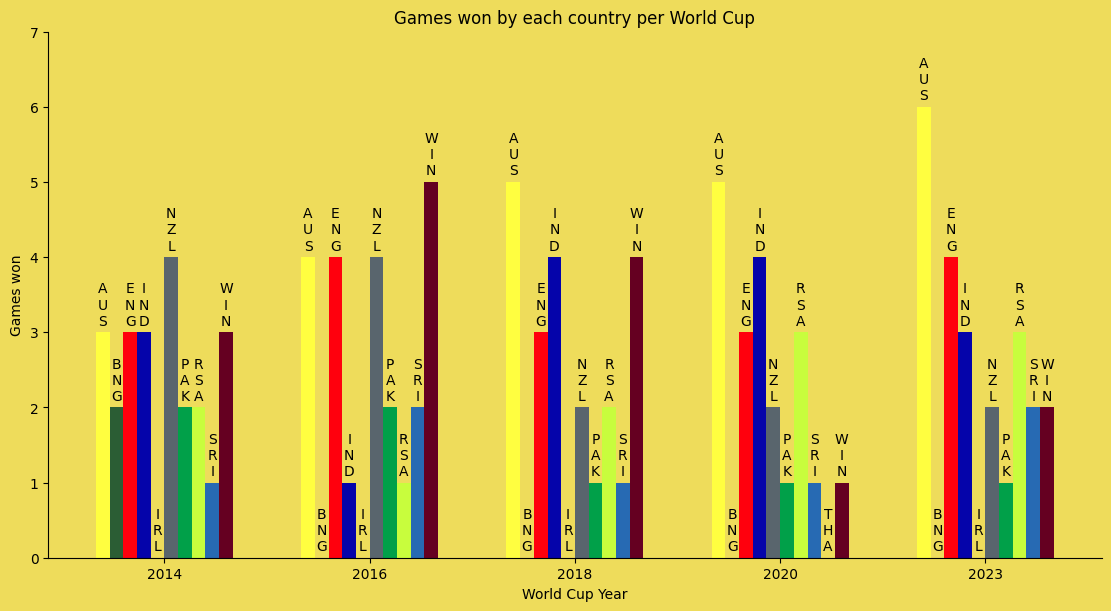

In [34]:
fig3, ax3 = plt.subplots(figsize=(11,6),layout='constrained')

for count, [teams,wins] in enumerate(years):
    offset = 30 * count
    colours = [COUNTRY_INFO[team][0] for team in teams]
    labels = [COUNTRY_INFO[team][1] for team in teams]
    formatted_labels = ['\n'.join(i) for i in labels]
    rects = ax3.bar(2*np.arange(len(teams)) + offset, wins,2,color=colours)
    ax3.bar_label(rects, labels=formatted_labels, padding=3)

ax3.set_ylabel('Games won')
ax3.set_xlabel("World Cup Year")
ax3.set_title('Games won by each country per World Cup')
ax3.set_xticks(30*np.arange(5)+9, titles)
ax3.set_ylim(0, 7)
fig3.set_facecolor("xkcd:dull yellow")
ax3.set_facecolor("xkcd:dull yellow")
ax3.spines[['right', 'top']].set_visible(False)

It's interesting to see that every year is the same set of 9 established teams, with Ireland and Thailand dropping in and out. This is quite reflective of the wide variance in success in international women's cricket, with associate nations really struggling to keep up with the investment and domestic competitions the larger cricketing nations can provide. The expansion of the 2026 and 2030 world cups to 12 and 16 nations respectively will hopefully begin to change this.

In [35]:
biggest_wins_df = original_data[['won by (runs)','won by (wickets)', 'winner','loser','Team 1', 'Team 2','date']].copy()
top_runs = (biggest_wins_df.nlargest(5,columns='won by (runs)',keep='all'))
top_wicks = (biggest_wins_df.nlargest(5,columns='won by (wickets)',keep='all'))

def horizontal_bar_chart(ax,df,text_offset,column):
    colours = [COUNTRY_INFO[j][0] for j in df['winner']]
    labels = [f"{COUNTRY_INFO[row['winner']][1]} (vs {COUNTRY_INFO[row['loser']][1]}), {row['date'][0:4]}" for _, row in df.iterrows()]

    rects = ax.barh(np.arange(len(df)) , df[column],0.65,color=colours,edgecolor='black')
    ax.bar_label(rects, padding=3)
    for bar,label in zip(rects,labels):
        ax.text(text_offset, bar.get_y()+bar.get_height()/2, label, color = 'xkcd:hot pink', backgroundcolor= 'white', ha = 'left', va = 'center',fontweight='bold') 

    ax.set_yticks([])
    ax.set_facecolor("xkcd:dull yellow")
    ax.spines[['right', 'top']].set_visible(False)


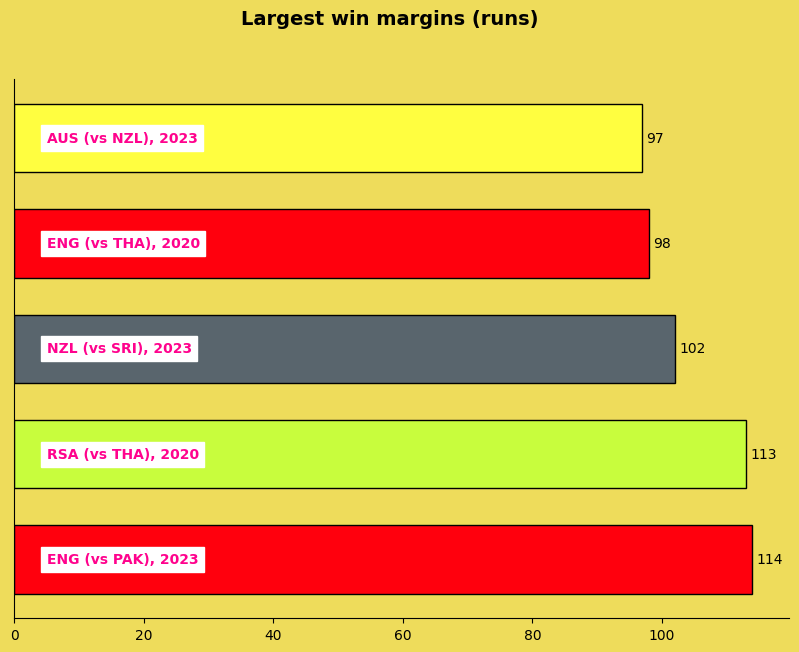

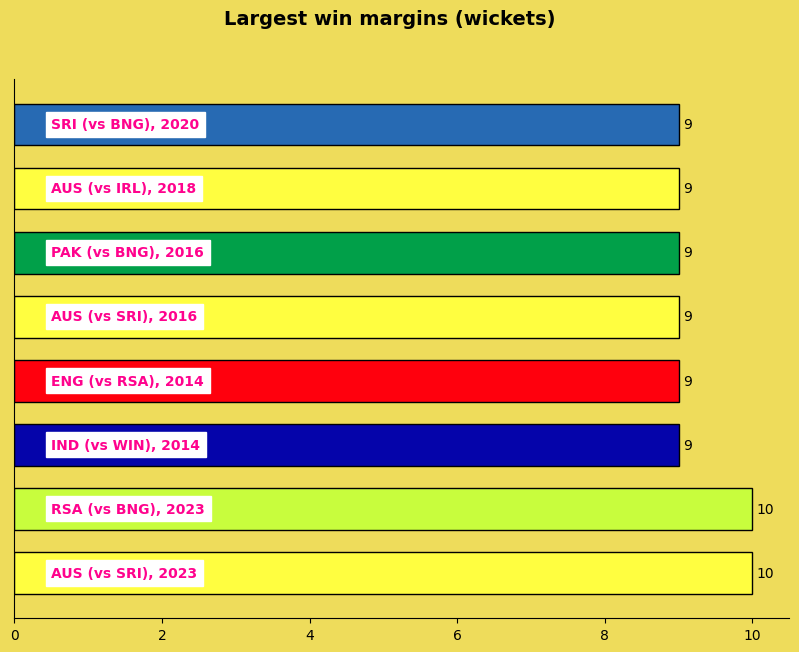

In [36]:
fig6 , ax6 = plt.subplots(figsize=(10, 7))
fig7 , ax7 = plt.subplots(figsize=(10, 7))
fig6.set_facecolor("xkcd:dull yellow")
fig7.set_facecolor("xkcd:dull yellow")
fig6.suptitle("Largest win margins (runs)",fontsize=14,fontweight='bold')
fig7.suptitle("Largest win margins (wickets)",fontsize=14,fontweight='bold')

horizontal_bar_chart(ax6,top_runs,5,'won by (runs)')
horizontal_bar_chart(ax7,top_wicks,0.5,'won by (wickets)')

In [37]:
player_achievements = original_data[['player_of_match','Team 1 Players','Team 2 Players','Team 1','Team 2']].copy().map(namecheck)
most_potms = (player_achievements['player_of_match'].value_counts()).nlargest(6,keep='all')

valuesPOTM = most_potms.to_list()
coloursPOTM = [COUNTRY_INFO[find_nationality(k)][0] for k in most_potms.index.to_list()]
labelsPOTM = [f"{k}\n({COUNTRY_INFO[find_nationality(k)][1]})" for k in most_potms.index.to_list()]

player_list = []

def format(row):
    row['Team 1 Players'] = row['Team 1 Players'].split("'")
    row['Team 1 Players'] = [namecheck(r) for r in row['Team 1 Players'] if r[0].isalpha()]
    row['Team 2 Players'] = row['Team 2 Players'].split("'")
    row['Team 2 Players'] = [namecheck(r) for r in row['Team 2 Players'] if r[0].isalpha()]

    player_list.append(pd.Series(row['Team 1 Players']))
    player_list.append(pd.Series(row['Team 2 Players']))
    return row

get_player_list = player_achievements.apply(lambda x : format(x),axis = 1)
most_apps = (pd.concat(player_list,axis=0)).value_counts().nlargest(10,keep='all')

valuesAPPS = most_apps.to_list()
labelsAPPS = [f"{k}\n{COUNTRY_INFO[find_nationality(k)][1]}" for k in most_apps.index.to_list()]
coloursAPPS = [COUNTRY_INFO[find_nationality(k)][0] for k in most_apps.index.to_list()]


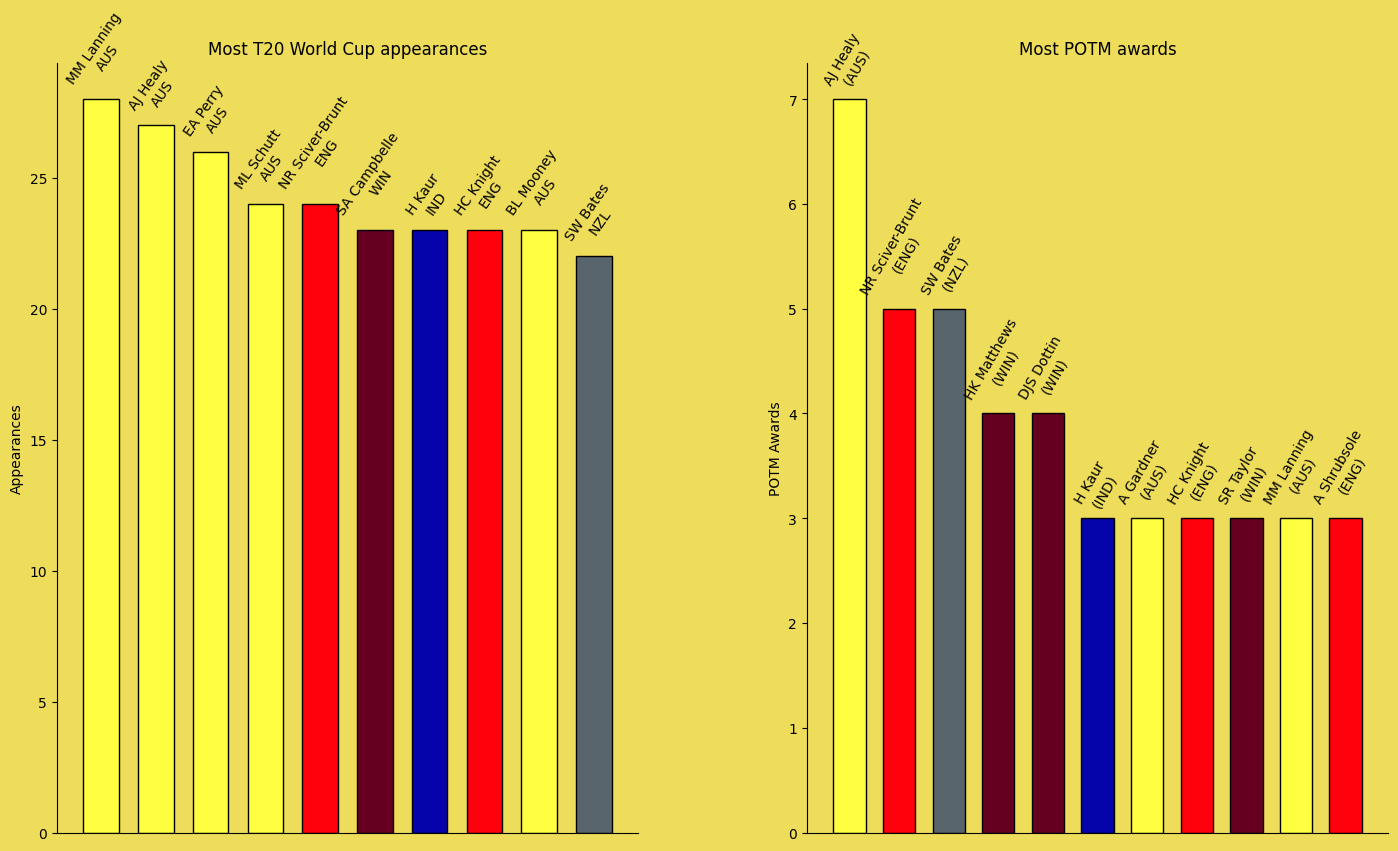

In [45]:
fig = plt.figure(figsize=(15, 10))
fig.set_facecolor("xkcd:dull yellow")
subfigs = fig.subfigures(1, 2,)

ax8a = subfigs[0].subplots()
ax8b = subfigs[1].subplots()

rects = ax8b.bar(2*np.arange(len(labelsPOTM)) ,valuesPOTM ,1.3,color=coloursPOTM,edgecolor='black')
ax8b.bar_label(rects, labels=labelsPOTM, padding=3,rotation=60)

rects = ax8a.bar(2*np.arange(len(labelsAPPS)) ,valuesAPPS ,1.3,color=coloursAPPS,edgecolor='black')
ax8a.bar_label(rects, labels=labelsAPPS, padding=3,rotation=55)

for ax,y_label,title in zip([ax8a,ax8b],['Appearances','POTM Awards'],['Most T20 World Cup appearances','Most POTM awards']):
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_facecolor("xkcd:dull yellow")
    ax.spines[['right', 'top']].set_visible(False)

Text(0.5, 1.0, 'Spread of nationalities of all players who have \nplayed at a T20 World Cup (since 2014)')

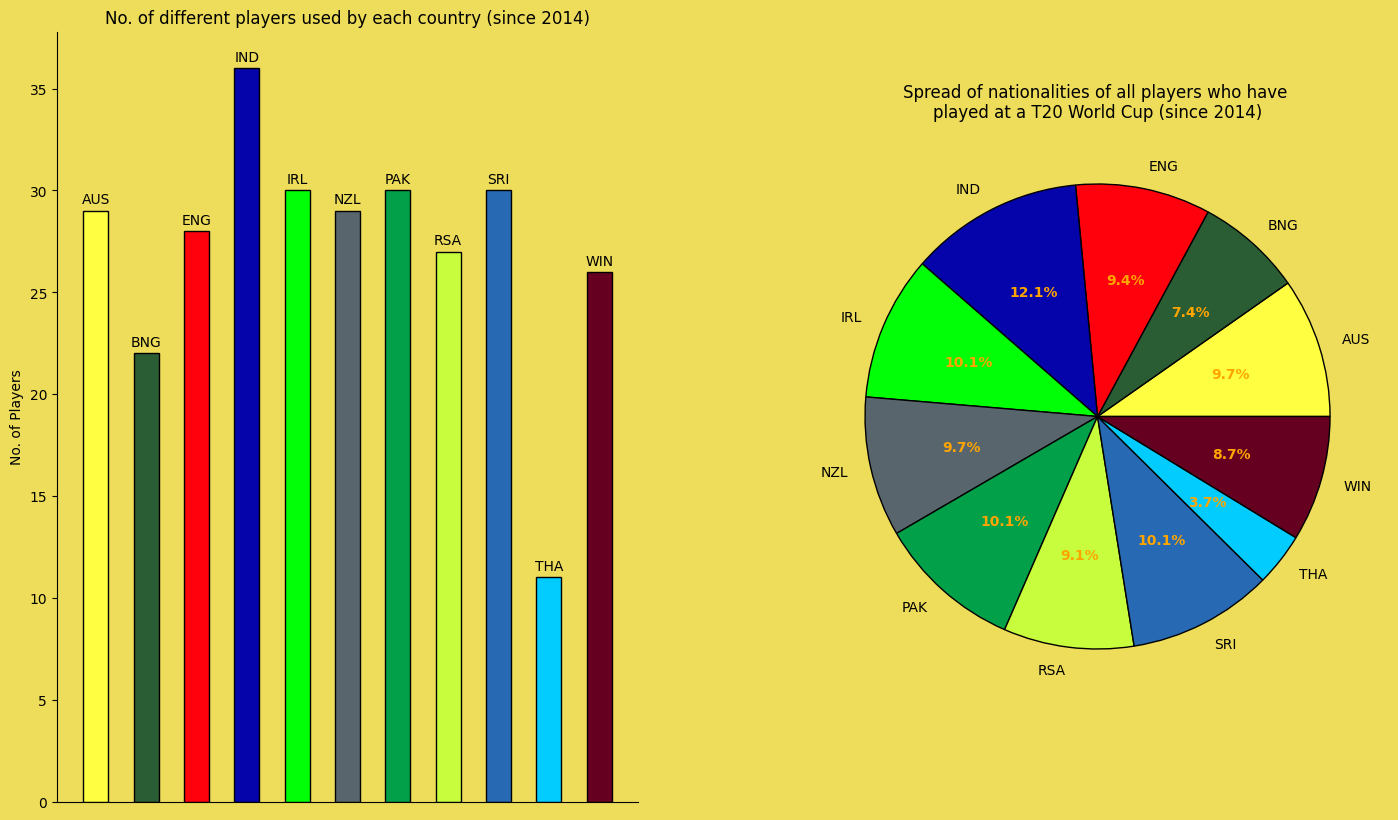

In [46]:
fig = plt.figure(figsize=(15, 10))
fig.set_facecolor("xkcd:dull yellow")
subfigs = fig.subfigures(1, 2,)

ax9a = subfigs[0].subplots()
ax9b = subfigs[1].subplots()

player_counts = player_data.count(axis=0)
values = player_counts.to_list()
labels = [COUNTRY_INFO[j][1] for j in player_counts.index.to_list()]
colours = [COUNTRY_INFO[j][0] for j in player_counts.index.to_list()]

rects = ax9a.bar(2*np.arange(len(labels)),values,1,color=colours,edgecolor='black')
ax9a.bar_label(rects,labels=labels,padding=3)
ax9a.set_ylabel("No. of Players")
ax9a.set_title("No. of different players used by each country (since 2014)")
ax9a.set_xticks([])
ax9a.set_facecolor("xkcd:dull yellow")
ax9a.spines[['right', 'top']].set_visible(False)


_, _, autotexts  = ax9b.pie(x=player_counts,colors=colours,autopct='%1.1f%%',labels=labels,wedgeprops={'edgecolor' : 'black'})
for autotext in autotexts:
    autotext.set_color('orange')
    autotext.set_fontweight('bold')
ax9b.set_title("Spread of nationalities of all players who have \nplayed at a T20 World Cup (since 2014)")